In [20]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.metrics import accuracy_score, precision_score,recall_score

# Importing data

In [21]:
df = pd.read_csv('Taitanic_train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Relations between variables

<AxesSubplot:title={'center':'Males and Females who survived'}, xlabel='Sex', ylabel='Survived'>

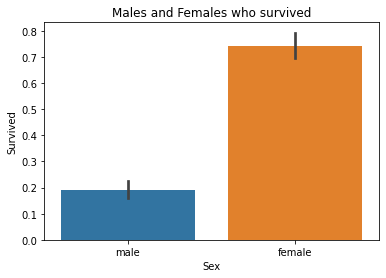

In [22]:
plt.title("Males and Females who survived")
sns.barplot(x=df['Sex'],
              y=df['Survived'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 6.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:title={'center':'Age of people who survived or did not survive'}, xlabel='Survived', ylabel='Age'>

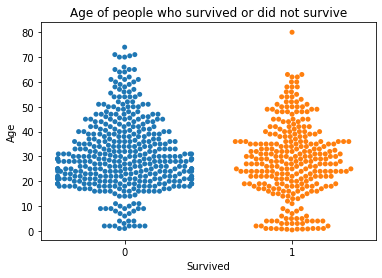

In [23]:
plt.title("Age of people who survived or did not survive")
sns.swarmplot(x=df['Survived'], y=df['Age'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 72.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 46.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:title={'center':"People's Fair who survived or did not survive"}, xlabel='Survived', ylabel='Fare'>

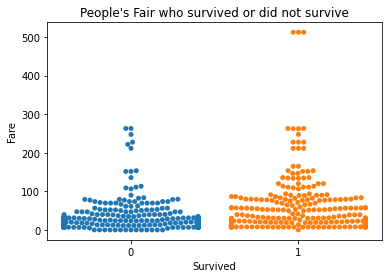

In [24]:
plt.title("People's Fair who survived or did not survive")
sns.swarmplot(x=df['Survived'], y=df['Fare'])

<AxesSubplot:title={'center':'Survived and not survived people with their Fare and Age'}, xlabel='Age', ylabel='Fare'>

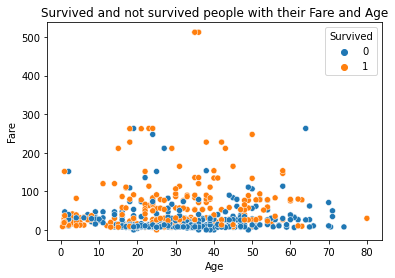

In [25]:
plt.title("Survived and not survived people with their Fare and Age")
sns.scatterplot(x=df['Age'], y=df['Fare'], hue=df['Survived'])

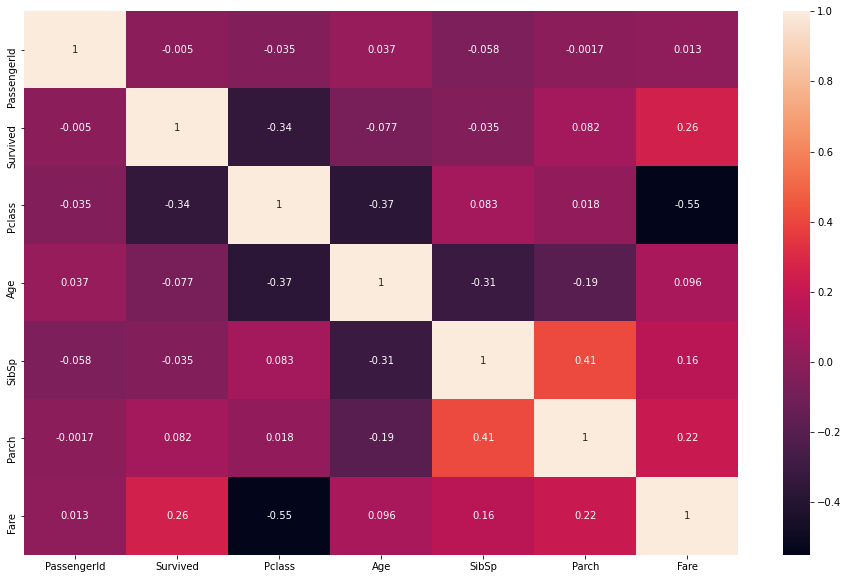

In [26]:
plt.figure(figsize = (16,10))
sns_plot=sns.heatmap(df.corr(),annot= True)
plt.show()

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [28]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# Feature selection

In [29]:
Df = df.drop(['PassengerId','Name','Ticket','Cabin','Embarked'],1)
Df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500
...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000
887,1,1,female,19.0,0,0,30.0000
888,0,3,female,NaN,1,2,23.4500
889,1,1,male,26.0,0,0,30.0000


In [30]:
y = Df['Survived']
x = Df.drop(['Survived'],1)

In [31]:
x

,Pclass,Sex,Age,SibSp,Parch,Fare
0,3,male,22.0,1,0,7.2500
1,1,female,38.0,1,0,71.2833
2,3,female,26.0,0,0,7.9250
3,1,female,35.0,1,0,53.1000
4,3,male,35.0,0,0,8.0500
...,...,...,...,...,...,...
886,2,male,27.0,0,0,13.0000
887,1,female,19.0,0,0,30.0000
888,3,female,NaN,1,2,23.4500
889,1,male,26.0,0,0,30.0000


# Categorical data

In [32]:
gender = df['Sex']
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
label_vector = encoder.fit_transform(gender)
label_vector1 = pd.DataFrame(label_vector)
x['Sex'] = label_vector1
x

,Pclass,Sex,Age,SibSp,Parch,Fare
0,3,1,22.0,1,0,7.2500
1,1,0,38.0,1,0,71.2833
2,3,0,26.0,0,0,7.9250
3,1,0,35.0,1,0,53.1000
4,3,1,35.0,0,0,8.0500
...,...,...,...,...,...,...
886,2,1,27.0,0,0,13.0000
887,1,0,19.0,0,0,30.0000
888,3,0,NaN,1,2,23.4500
889,1,1,26.0,0,0,30.0000


# Handel missing data

In [33]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [34]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values= np.nan, strategy='mean')
X = pd.DataFrame(imputer.fit_transform(x.values))
X.columns = ['Pclass','Sex','Age','SibSp','Parch','Fare']
X

,Pclass,Sex,Age,SibSp,Parch,Fare
0,3.0,1.0,22.000000,1.0,0.0,7.2500
1,1.0,0.0,38.000000,1.0,0.0,71.2833
2,3.0,0.0,26.000000,0.0,0.0,7.9250
3,1.0,0.0,35.000000,1.0,0.0,53.1000
4,3.0,1.0,35.000000,0.0,0.0,8.0500
...,...,...,...,...,...,...
886,2.0,1.0,27.000000,0.0,0.0,13.0000
887,1.0,0.0,19.000000,0.0,0.0,30.0000
888,3.0,0.0,29.699118,1.0,2.0,23.4500
889,1.0,1.0,26.000000,0.0,0.0,30.0000


In [35]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.25, random_state=47)

In [36]:
from sklearn.linear_model import LogisticRegression
lg = LogisticRegression()
lg.fit(x_train, y_train)

LogisticRegression()

In [37]:
y_pred_train = lg.predict(x_train)
y_pred_test = lg.predict(x_test)

In [38]:
print('Accuracy score for train : ', accuracy_score(y_train, y_pred_train)*100)
print('Accuracy score for test : ', accuracy_score(y_test, y_pred_test)*100)

Accuracy score for train :  80.38922155688623
Accuracy score for test :  80.71748878923766


In [39]:
# _____________________________________________________________

In [40]:
test = pd.read_csv('Taitanic_test.csv')
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [41]:
test.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

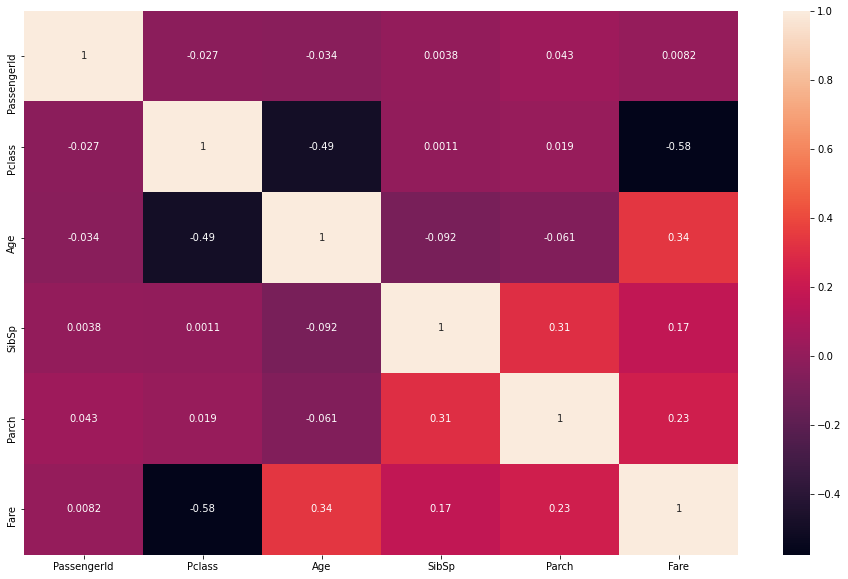

In [42]:
plt.figure(figsize = (16,10))
sns_plot=sns.heatmap(test.corr(),annot= True)
plt.show()

In [43]:
Id = test['PassengerId']

test = test.drop(['PassengerId','Name','Ticket','Cabin','Embarked'],1)
test

,Pclass,Sex,Age,SibSp,Parch,Fare
0,3,male,34.5,0,0,7.8292
1,3,female,47.0,1,0,7.0000
2,2,male,62.0,0,0,9.6875
3,3,male,27.0,0,0,8.6625
4,3,female,22.0,1,1,12.2875
...,...,...,...,...,...,...
413,3,male,NaN,0,0,8.0500
414,1,female,39.0,0,0,108.9000
415,3,male,38.5,0,0,7.2500
416,3,male,NaN,0,0,8.0500


In [44]:
Id

0       892
1       893
2       894
3       895
4       896
       ... 
413    1305
414    1306
415    1307
416    1308
417    1309
Name: PassengerId, Length: 418, dtype: int64

In [45]:
gender = test['Sex']
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
label_vector = pd.DataFrame(encoder.fit_transform(gender))
label_vector
test['Sex'] = label_vector1
test

,Pclass,Sex,Age,SibSp,Parch,Fare
0,3,1,34.5,0,0,7.8292
1,3,0,47.0,1,0,7.0000
2,2,0,62.0,0,0,9.6875
3,3,0,27.0,0,0,8.6625
4,3,1,22.0,1,1,12.2875
...,...,...,...,...,...,...
413,3,1,NaN,0,0,8.0500
414,1,1,39.0,0,0,108.9000
415,3,0,38.5,0,0,7.2500
416,3,0,NaN,0,0,8.0500


In [46]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values= np.nan, strategy='mean')
test = pd.DataFrame(imputer.fit_transform(test.values))
test

,0,1,2,3,4,5
0,3.0,1.0,34.50000,0.0,0.0,7.8292
1,3.0,0.0,47.00000,1.0,0.0,7.0000
2,2.0,0.0,62.00000,0.0,0.0,9.6875
3,3.0,0.0,27.00000,0.0,0.0,8.6625
4,3.0,1.0,22.00000,1.0,1.0,12.2875
...,...,...,...,...,...,...
413,3.0,1.0,30.27259,0.0,0.0,8.0500
414,1.0,1.0,39.00000,0.0,0.0,108.9000
415,3.0,0.0,38.50000,0.0,0.0,7.2500
416,3.0,0.0,30.27259,0.0,0.0,8.0500


In [47]:
res =  lg.predict(test)
res

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,

In [48]:
Submission = pd.DataFrame(Id)
# Submission.to_csv('Submission.csv',index =False)
Submission['Survived'] = res

In [49]:
Submission

,PassengerId,Survived
0,892,0
1,893,0
2,894,1
3,895,1
4,896,0
...,...,...
413,1305,0
414,1306,0
415,1307,1
416,1308,1


In [50]:
Submission.to_csv('Submission.csv',index =False)